In [335]:
import os
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt

In [38]:
PATH = 'data/radar/'
DAY = sorted(os.listdir(PATH))[0]

In [41]:
first_file = PATH+str(DAY)+'/'+str(sorted(os.listdir(PATH+str(DAY)))[0])
try:
    xds = xr.open_dataset(first_file)   
except Exception as e:
    print('File not found')
    
RUNIT = xds.rain_rate.units
RKM = xds.rain_rate.height_km
LON = xds.lon0.data                 ### Coordinate Longitude Matrix
LAT = xds.lat0.data                 ### Corrdinate Latitude Matrix
X0 = xds.x0                         ### Matrix of points
Y0 = xds.y0
RADAR = (np.median(LON),np.median(LAT))

In [42]:
def read_data(date):
    
    path = 'data/radar/'
    dataset = []
    interval = len(os.listdir(path+str(date)))    
    
    # Original grid dimensions
    nx = 241
    ny = 241

    # Define container
    frames = np.zeros( (interval, nx, ny ) )    
    
    for i in range(interval):
        d = str(path)+str(date)+'/'
        file = (sorted(os.listdir(path+str(date)))[i])
        xds = xr.open_dataset(d+file)
        rr = xds.rain_rate
        frames[i] =  rr
            
    return frames

In [449]:
def pre_processing(time):
    np.warnings.filterwarnings('ignore')
    
    ## thereshold value to track
    threshold = 0
    
    rs =  (np.where(time != np.nan) and np.where(time > threshold))
    rs = np.asanyarray(rs)
    pe = pd.DataFrame({'x':rs[0],'y':rs[1]})

    rr = []
    for i,row in pe.iterrows():
        rr.append(time[row.x][row.y])
        
    pe['rain'] = rr
    
    return pe

In [450]:
DAY = 20140224
figtime = 0
frames = read_data(DAY)
rdata = pre_processing(frames[figtime])
rdata

,x,y,rain
0,26,84,0.773127
1,27,81,7.370550
2,27,82,1.547614
3,27,83,0.804233
4,28,79,12.034945
...,...,...,...
2043,191,163,0.966392
2044,192,160,0.921154
2045,192,161,1.252355
2046,192,162,0.643433


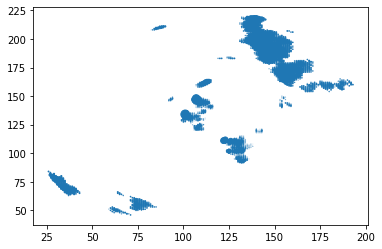

In [451]:
plt.scatter(rdata.x,rdata.y,rdata.rain)

In [459]:
from scipy.cluster.hierarchy import fclusterdata
from scipy.spatial.distance import pdist

clusters = fclusterdata(rdata[{'x','y'}].values, t=0.5, criterion='distance', depth=1)
clusters

array([ 120,    3,    1, ..., 1369, 1368, 1371], dtype=int32)

In [454]:
clusters.max()

3

In [467]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)

(10, 2)


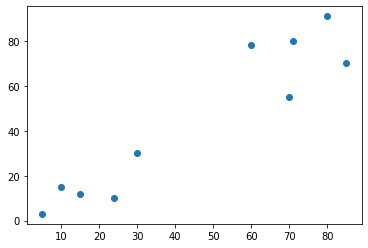

In [530]:
# generate two clusters: a with 100 points, b with 50:
np.random.seed(4711)  # for repeatability of this tutorial

X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

print (X.shape)  # 150 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.show()

In [534]:
X

array([[ 5,  3],
       [10, 15],
       [15, 12],
       [24, 10],
       [30, 30],
       [85, 70],
       [71, 80],
       [60, 78],
       [70, 55],
       [80, 91]])

In [533]:
Z = linkage(X, 'single')
Z

array([[ 1.     ,  2.     ,  5.83095,  2.     ],
       [ 3.     , 10.     ,  9.21954,  3.     ],
       [ 6.     ,  7.     , 11.18034,  2.     ],
       [ 0.     , 11.     , 13.     ,  4.     ],
       [ 9.     , 12.     , 14.21267,  3.     ],
       [ 5.     , 14.     , 17.20465,  4.     ],
       [ 4.     , 13.     , 20.88061,  5.     ],
       [ 8.     , 15.     , 21.2132 ,  5.     ],
       [16.     , 17.     , 47.16991, 10.     ]])

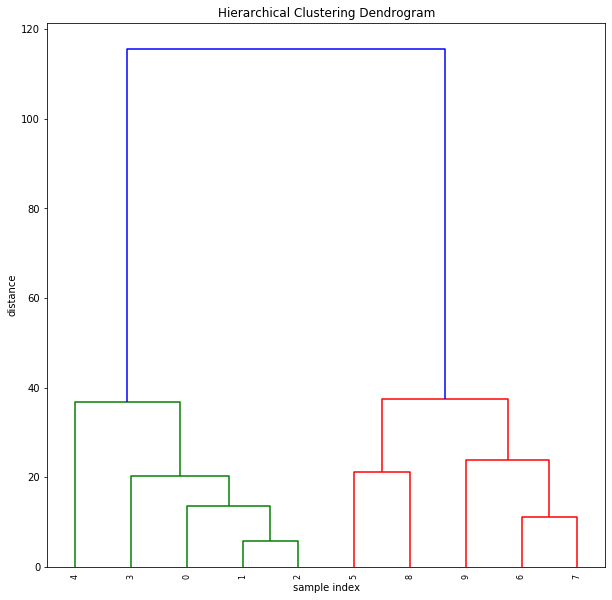

In [532]:
# calculate full dendrogram
plt.figure(figsize=(10, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [498]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

0.9800148387574268

In [500]:
Z[:20]

array([[ 52.     ,  53.     ,   0.04151,   2.     ],
       [ 14.     ,  79.     ,   0.05914,   2.     ],
       [ 33.     ,  68.     ,   0.07107,   2.     ],
       [ 17.     ,  73.     ,   0.07137,   2.     ],
       [  1.     ,   8.     ,   0.07543,   2.     ],
       [ 85.     ,  95.     ,   0.10928,   2.     ],
       [108.     , 131.     ,   0.11007,   2.     ],
       [  9.     ,  66.     ,   0.11302,   2.     ],
       [ 15.     ,  69.     ,   0.11429,   2.     ],
       [ 63.     ,  98.     ,   0.1212 ,   2.     ],
       [107.     , 115.     ,   0.12167,   2.     ],
       [ 65.     ,  74.     ,   0.1249 ,   2.     ],
       [ 58.     ,  61.     ,   0.14028,   2.     ],
       [ 62.     , 152.     ,   0.1726 ,   3.     ],
       [ 41.     , 158.     ,   0.1779 ,   3.     ],
       [ 10.     ,  83.     ,   0.18635,   2.     ],
       [114.     , 139.     ,   0.20419,   2.     ],
       [ 39.     ,  88.     ,   0.20628,   2.     ],
       [ 70.     ,  96.     ,   0.21931,   2. 

In [491]:
T = linkage(rdata[{'x','y'}].values,'ward')
c_,  coph_dists = cophenet(T, pdist(rdata[{'x','y'}].values))
c_
T[:20]

array([[ 2.,  3.,  1.,  2.],
       [ 1.,  6.,  1.,  2.],
       [11., 12.,  1.,  2.],
       [ 4.,  5.,  1.,  2.],
       [ 9., 10.,  1.,  2.],
       [16., 17.,  1.,  2.],
       [ 7.,  8.,  1.,  2.],
       [23., 24.,  1.,  2.],
       [25., 34.,  1.,  2.],
       [14., 15.,  1.,  2.],
       [32., 33.,  1.,  2.],
       [44., 45.,  1.,  2.],
       [56., 57.,  1.,  2.],
       [42., 43.,  1.,  2.],
       [21., 22.,  1.,  2.],
       [19., 20.,  1.,  2.],
       [29., 30.,  1.,  2.],
       [40., 41.,  1.,  2.],
       [54., 55.,  1.,  2.],
       [66., 67.,  1.,  2.]])